# Calculating Fugacity 

As defined in the previous lecture, the criteria for equilibrium are:

1. $T^{v}=T^{l}$

2. $P^{v}=P^{l}$

3. $\underline{G}^v=\underline{G}^l$

While this definition is useful, it is not immediate obvious how equilibrium conditions are determined from a volumetric equation of state.

For this purpose, the concept of fugacity was invented which is a mathematical relationship representing how fugitive a fluid is (meaning how volatile). We will show below that the fugacity is a measure of the deviation from ideal gas behavior and we will leverage residual properties in order to calculate it.


## Definition of Fugacity

By the definition above, vapor-liquid equilibrium is defined as the condition where $\underline{G}^v=\underline{G}^l$ at the same temperature and pressure.

Mathematically we showed in our previous lecture that :

$$d\underline{G}=\underline{V}dP-\underline{S}dT$$

so we can write that in the differential form:

$$\bigg(\dfrac{\partial \underline{G}}{\partial P}\bigg)_T=\underline{V}$$

or in the difference form:

$$\underline{G}(T_1,P_2)-\underline{G}(T_1,P_1)=\int_{P_1}^{P_2}\underline{V}dP$$

We define the **departure function** of the Gibbs Free Energy in order to keep the integral finite as $\underline{V}\rightarrow\infty$ and find that:

$$\underline{G}^R(T,P)=\int_{0}^{P}\bigg(\underline{V}-\dfrac{RT}{P}\bigg)dP$$

The integral on the right hand side is not a convenient one to evaluate for cubic equations of states because we cannot rearrange the cubic form so that it is explicit for $\underline{V}$. Instead, we must use our calculus to rearrange this expression. First, we recall that 

$$dP=\dfrac{1}{\underline{V}}d(P\underline{V})-\dfrac{P}{\underline{V}}d\underline{V}$$

breaking the above into two pieces, we have:

$$\underline{G}^R(T,P)=\int_{0}^{P}\underline{V}dP-\int_{0}^{P}\dfrac{RT}{P}dP$$

and substituting we get:

$$\underline{G}^R(T,P)=
\int_{0}^{P\underline{V}}d(P\underline{V})-\int_{0}^{P}Pd\underline{V}
-\int_{0}^{P\underline{V}}\dfrac{RT}{P\underline{V}}d(P\underline{V})+\int_{0}^{P}\dfrac{RT}{\underline{V}}d\underline{V}$$

Using the definition of the compressibility,$Z=\dfrac{P\underline{V}}{RT}$ the above can be reformulated

$$\underline{G}^R(T,P)=
RT\int_{0}^{Z}d(Z)-\int_{0}^{P}Pd\underline{V}
-RT\int_{0}^{P\underline{V}}\dfrac{1}{Z}d(Z)+\int_{0}^{P}\dfrac{RT}{\underline{V}}d\underline{V}=
RT(Z-1) - RTln(Z) + \int_{0}^{P}\big(\dfrac{RT}{\underline{V}}-P\big)d\underline{V} $$


Dividing both sides by $RT$ to make the expression unitless, we define the **fugacity coefficient $\phi$** as:

$$ln{\phi}=\dfrac{1}{RT}\int_{\infty}^{\underline{V}}\bigg(\dfrac{RT}{\underline{V}}-P\bigg)d\underline{V}+(Z-1) - ln(Z)$$


recall here that within the integral expression:

- $\dfrac{RT}{\underline{V}}$ is the ideal gas


- $P$ is the equation of state that describes the deviation from the ideal gas state

If there is no deviation from ideal gas behavior, then the integrand is $0$ and the $Z=1$ so that $\phi=0$

The **fugacity** is defined as the product of the Pressure and the fugacity coefficient:

$$\mathit{f}=P\phi$$

it has units of Pressure

## Vapor Liquid Equilibrium with fugacity

it can be shown that $\underline{G}^v=\underline{G}^l$ is equivalent to saying $\mathit{f}^v=\mathit{f}^l$ and $\phi^v=\phi^l$ such that if the fugacity coefficient at a given temperature and pressure is the same, then the vapor and liquid phase are said to be in equilibrium.

In general fugacity coefficients can be derived analytically for many volumetric equations of state

### Virial Equation of State

Equation of state:

$\quad P=\dfrac{RT}{\underline{V}}+\dfrac{B(T)}{\underline{V}}$

Fugacity Coefficient:

$\quad \ln{\phi}=\dfrac{2P B(T)}{ZRT} - \ln{Z}$

where $Z$ must be determined by finding the real and positive roots of the equation at a given temperature and pressure and applying the stability criteria to determine the stable phase.

### Van Der Waal's Equation of State

Equation of state:

$\quad P=\dfrac{RT}{\underline{V}-b}-\dfrac{a}{\underline{V}^2}$

Fugacity Coefficient:

$\quad \ln{\phi}=\ln{\dfrac{\underline{V}}{\underline{V}-b}}-\dfrac{a}{RT\underline{V}}+Z-1-\ln{Z}$

where $Z$ must be determined by finding the real roots of the equation at a given temperature and pressure and applying the stability criteria to determine the stable phase points.


## Constructing VLE Envelope with Equation of State

Lets use phasepy and find the VLE envelope. We will do this step by step:


### First lets specify some real gas properties

In [1]:
%matplotlib notebook
%matplotlib inline

from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

from phasepy import component, mixture, preos
Tc=647.13 #K
Pc=220.55 #bar
Vc=58 #cm^3/mol
w=0.344861
Tr=1
water = component(name='water', Tc=Tc, Pc=Pc, w=w)
eos=preos(water,'mhv_unifac')

### Next lets calculate an isotherm below $T_c$

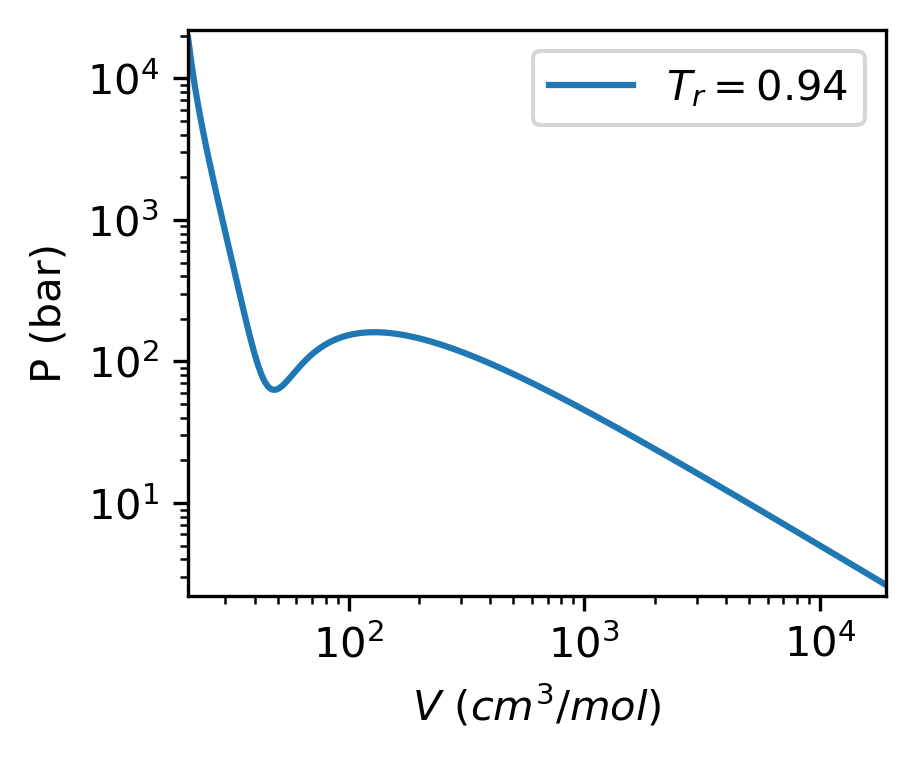

In [2]:
Tr=0.94
v=np.logspace(np.log10(eos.b[0]*1.1),np.log10(1000*eos.b[0]),201)
fig=plt.figure(figsize=(3,2.5),dpi=300)
plt.plot(v,eos(Tr*Tc,v),label=r'$T_r=%3.2f$'%Tr)
plt.xlim(min(v),max(v))
plt.ylim(0.01*Pc,100*Pc)
plt.yscale('log')
plt.xscale('log')
plt.ylabel('P (bar)')
plt.xlabel(r'$V$ $(cm^3/mol)$')

plt.legend()


### Now we need some candidate vapor pressures

If we examine the shape of the isotherm, we can see that there is only a narrow region of the curve where more than one real root will satisfy the equation of state.

We can domnstrate this by picking three pressures:

1. high pressure $1000$ $bar$

2. middle pressure $100$ $bar$

3. low pressure $10$ $bar$


to find the roots, we will utilize our compressibility equation:

$$Z^3+\alpha Z^2+\beta Z + \gamma = 0 $$

for the PR Equation of state:

$\quad \alpha=-1+B$

$\quad \beta=A-3B^2-2B$

$\quad \gamma=-AB+B^2+B^3$

and $A=\dfrac{aP}{RT}$ and $B=\dfrac{bP}{RT}$

$a=0.45724\dfrac{RT_c}{P_c}\alpha(T)$

where 

$\sqrt{\alpha}=1+\kappa\bigg(1-\sqrt{T_r}\bigg)$ and $\kappa=0.37464+1.54226\omega-0.26992\omega^2$


These equations seem tediuous, but they are easily programmed. Lets do that below:

[0.97877473+0.j         0.00873628+0.00201275j 0.00873628-0.00201275j]
[9.97899886e-01+0.j         8.62421846e-04+0.00021222j
 8.62421846e-04-0.00021222j]
[9.99790206e-01+0.00000000e+00j 8.61336520e-05+2.13227445e-05j
 8.61336520e-05-2.13227445e-05j]


Text(0.5, 0, '$V$ $(cm^3/mol)$')

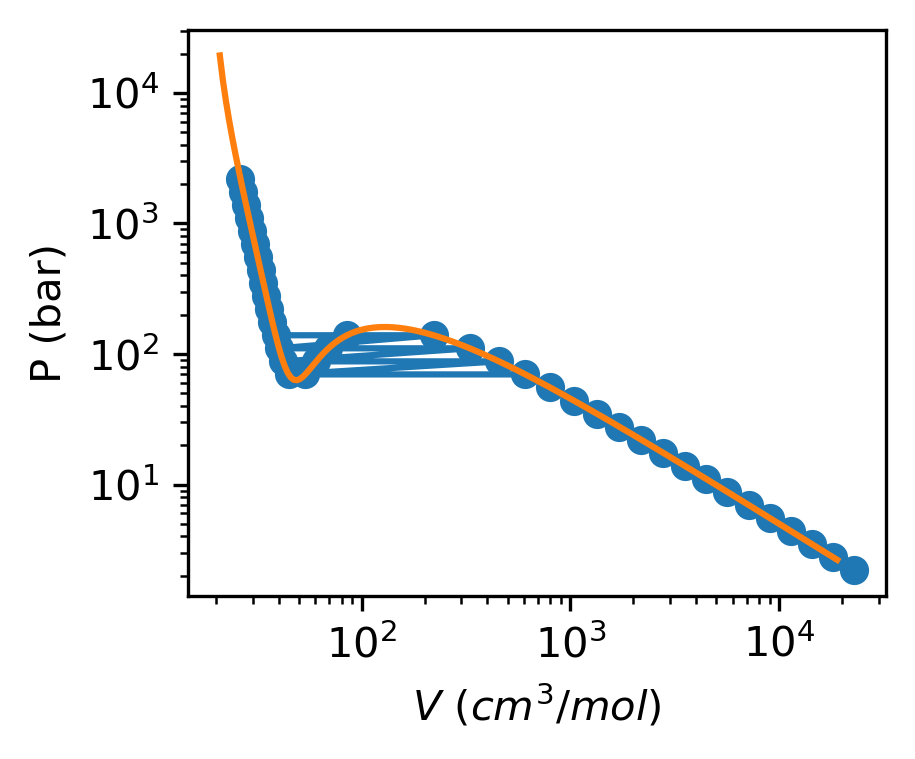

In [3]:
##define the compressibility coefficients at a given temperature and pressure

R=8.314##j/mol*k
def Zcoeff(T,P):
    def kappa():
        return 0.37464+1.54266*w-0.26992*w**2
    def alpha(Tr):    
        return (1+kappa()*(1-np.sqrt(Tr)))**2
    def a(Tr):
        return 0.45724*(R*Tc)**2/(Pc*10**5)*alpha(Tr)
    def b():
        return 0.07780*R*Tc/(Pc*10**5)
    Tr=T/Tc
    
    A=a(Tr)*P/(R*T)**2
    B=b()*P/(R*T)
    
    return [1,
            -1+B,
            A-3*B**2-2*B,
            -A*B+B**2+B**3]

print(np.roots(Zcoeff(Tc*Tr,1e6)))
print(np.roots(Zcoeff(Tc*Tr,1e5)))
print(np.roots(Zcoeff(Tc*Tr,1e4)))

p_=[]
v_=[]
for P in np.logspace(-2,1,31)*Pc*10**5:
    
    for root in np.roots(Zcoeff(Tc*Tr,P)):
        if(np.isreal(root)):
            #print(root.real)
            p_.append(P)
            v_.append(R*Tc*Tr*root.real/P)
            
plt.figure(dpi=300,figsize=(3,2.5))
plt.plot(np.asarray(v_)*10**6,np.asarray(p_)/10**5,marker='o')
plt.plot(v,eos(Tr*Tc,v),label=r'$T_r=%3.2f$'%Tr)
plt.yscale('log')
plt.xscale('log')
plt.ylabel('P (bar)')
plt.xlabel(r'$V$ $(cm^3/mol)$')


### Identifying the Stable Phase Points
In the plot above, we see that there are many potential candidates that define the saturation pressure. How do we know which one to choose? 

First, we apply the stability criteria

$$\bigg(\dfrac{\partial P}{\partial \underline{V}}\bigg)_T<0$$

This criteria requires that the slope of the isotherm by negative. If we examine the points on the plot above, we can see that it will always be the **middle root**.


Text(0.5, 0, '$V$ $(cm^3/mol)$')

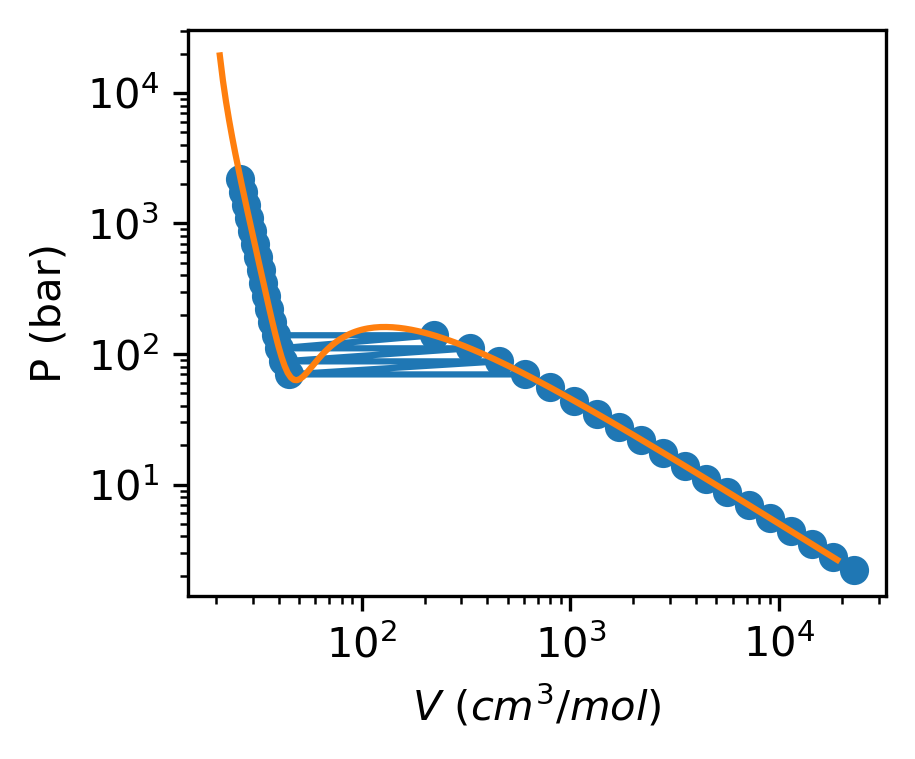

In [4]:
p_=[]
v_=[]
for P in np.logspace(-2,1,31)*Pc*10**5:
    
    for root in [np.roots(Zcoeff(Tc*Tr,P))[0],np.roots(Zcoeff(Tc*Tr,P))[2]]:
        if(np.isreal(root)):
            #print(root.real)
            p_.append(P)
            v_.append(R*Tc*Tr*root.real/P)
            
plt.figure(dpi=300,figsize=(3,2.5))
plt.plot(np.asarray(v_)*10**6,np.asarray(p_)/10**5,marker='o')
plt.plot(v,eos(Tr*Tc,v),label=r'$T_r=%3.2f$'%Tr)
plt.yscale('log')
plt.xscale('log')
plt.ylabel('P (bar)')
plt.xlabel(r'$V$ $(cm^3/mol)$')


### Calculating the fugacity of the liquid and vapor phases.

Now we calculate the fugacity as a function of the guess pressure. We can do this conveniently with phasepy, but we will demonstrate the calculation below:


Text(0, 0.5, '$\\ln{\\phi}$')

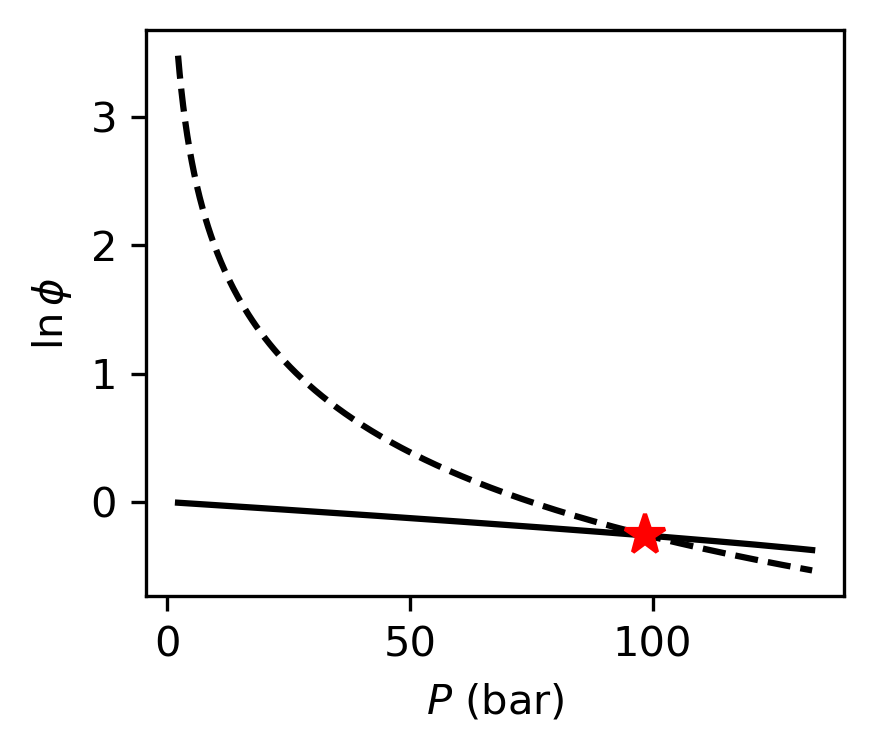

In [5]:
%matplotlib inline
from scipy.integrate import quad

#This function returns the PR EOS
def PR_EOS(T,V):
    def kappa():
        return 0.37464+1.54266*w-0.26992*w**2
    def alpha(Tr):    
        return (1+kappa()*(1-np.sqrt(Tr)))**2
    def a(Tr):
        return 0.45724*(R*Tc)**2/(Pc*10**5)*alpha(Tr)
    def b():
        return 0.07780*R*Tc/(Pc*10**5)
    Tr=T/Tc
    P1=R*T/(V-b())
    P2=a(Tr)/(V*(V+b())+b()*(V-b()))
    
    return P1-P2

##Integrates Fugacity
def Integrand(V,T):
    return R*T/V-PR_EOS(T,V)
##for each temperatur

P_=[]
phiv_=[]
phil_=[]


Tr=0.90
##finds the fugacity for each guess pressure
for P in np.logspace(-2,0,201)*Pc*10**5:
    T=Tc*Tr
    ###Find roots of cubic equation of state
    roots=np.roots(Zcoeff(T,P))

    #roots array contains three roots
    #check if roots contains three real values
    check=0
    #print(roots)
    for root in roots:
        if(root.imag==0):##then the root is real
            check+=1
    #if there are three real roots, proceed with fugacity calculation  
    if(check==3):   
        roots=sorted(roots)
        Zv=roots[2]#the large root is the vapor compressibility
        Zl=roots[0]#the smallest root is the liquid compressibility 
        
        Vv=Zv*R*T/P
        Vl=Zl*R*T/P
        
        phiv=quad(Integrand,np.inf,Vv,args=(T))[0]/(R*T)-np.log(Zv)+(Zv-1)#calculate the fugacity coefficient for a vapor
        phil=quad(Integrand,np.inf,Vl,args=(T))[0]/(R*T)-np.log(Zl)+(Zl-1)#calculate the fugacity coefficient for a liquid

        phiv_.append(phiv)#calculate the fugacity coefficient for a vapor
        phil_.append(phil)#calculate the fugacity coefficient for a liquid
        P_.append(P/10**5)

plt.figure(figsize=(3,2.5),dpi=300)
plt.plot(P_,phiv_,'k-')
plt.plot(P_,phil_,'k--')

idx = np.argwhere(np.diff(np.sign(np.asarray(phiv_)-np.asarray(phil_)))).flatten()[0]
plt.plot(P_[idx],phiv_[idx],'r*',markersize=10)

plt.xlabel(r'$P$ (bar)')
plt.ylabel(r'$\ln{\phi}$')

The starred point is the point where the fugacity of the liquid and vapor phases are equal

### Let's compute the VLE envelope

We will copy the above into a function

Text(0.5, 0, '$V$ $(cm^3/mol)$')

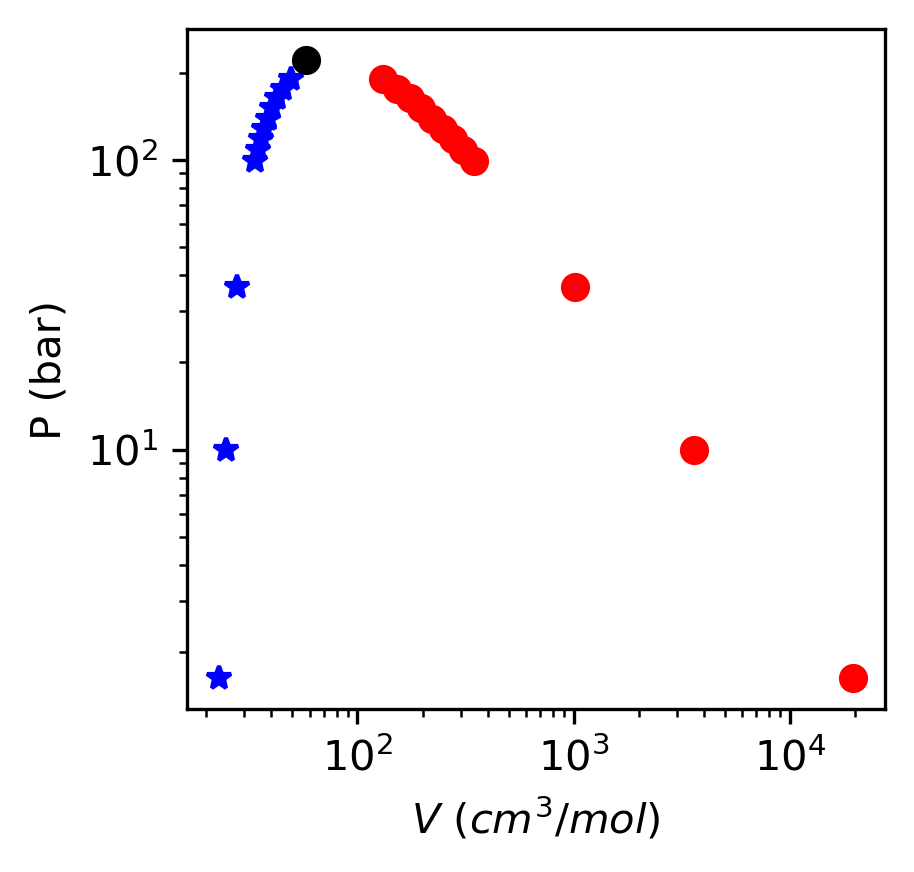

In [8]:
def psat(Tr,prmin=-4,prmax=0,npts=201):
    
    P_=[]
    phiv_=[]
    phil_=[]
    
    vv_=[]
    vl_=[]
    ##finds the fugacity for each guess pressure
    for P in np.logspace(prmin,prmax,npts)*Pc*10**5:
        T=Tc*Tr
        ###Find roots of cubic equation of state
        roots=np.roots(Zcoeff(T,P))

        #roots array contains three roots
        #check if roots contains three real values
        check=0
        #print(roots)
        for root in roots:
            if(root.imag==0):##then the root is real
                check+=1
        #if there are three real roots, proceed with fugacity calculation  
        if(check==3):   
            roots=sorted(roots)
            Zv=roots[2]#the large root is the vapor compressibility
            Zl=roots[0]#the smallest root is the liquid compressibility 

            Vv=Zv*R*T/P
            Vl=Zl*R*T/P
            
            vv_.append(Vv)
            vl_.append(Vl)
            
            phiv=quad(Integrand,np.inf,Vv,args=(T))[0]/(R*T)-np.log(Zv)+(Zv-1)#calculate the fugacity coefficient for a vapor
            phil=quad(Integrand,np.inf,Vl,args=(T))[0]/(R*T)-np.log(Zl)+(Zl-1)#calculate the fugacity coefficient for a liquid

            phiv_.append(phiv)#calculate the fugacity coefficient for a vapor
            phil_.append(phil)#calculate the fugacity coefficient for a liquid
            P_.append(P/10**5)
    idx = np.argwhere(np.diff(np.sign(np.asarray(phiv_)-np.asarray(phil_)))).flatten()[0]
    
    return P_[idx],vv_[idx],vl_[idx]

veqv_=[]
veql_=[]
ps_=[]
for Tr in [0.98,0.97,0.96,0.95,0.94,0.93,0.92,0.91,0.9,0.8,0.7,0.6]:
    
    ps,vv,vl=psat(Tr)
    ps,vv,vl=psat(Tr,
                  prmin=np.log10(ps/Pc*0.5),
                  prmax=np.log10(ps/Pc*1.5),
                 npts=1001)
    
    #print(Tr,ps,vv,vl)
    veqv_.append(vv*10**6)
    veql_.append(vl*10**6)
    ps_.append(ps)

plt.figure(dpi=300,figsize=(3,3))
plt.plot(veqv_,ps_,'ro')
plt.plot(veql_,ps_,'b*')
plt.plot(Vc,Pc,'ko')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('P (bar)')
plt.xlabel(r'$V$ $(cm^3/mol)$')


In [7]:
print(Pc)

220.55
